In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data2020 = pd.read_csv('./data/Greenhouse Gas Emissions_2020.csv')
data2019 = pd.read_csv('./data/Greenhouse Gas Emissions_2019.csv')
data2018 = pd.read_csv('./data/Greenhouse Gas Emissions_2018.csv')
data2018.rename(columns={'HFCs': 'HFC', 'PFCs': 'PFC'}, inplace=True)
data2019.rename(columns={'HFCs': 'HFC', 'PFCs': 'PFC'}, inplace=True)
data2020.rename(columns={'HFCs': 'HFC', 'PFCs': 'PFC'}, inplace=True)


finaldata = pd.concat([data2020, data2019, data2018])

finaldata

,Year,GHGRP ID,National Pollutant Release Inventory (NPRI) identifier,Company & facility name,NAICS,City,Province / territory,CO2,CH4,N20,HFC,PFC,SF6,Total,PDGES ID,NPRI,Company name and facility,Town,Province
0,2020,G10327,19289.0,Rio Tinto Alcan Inc - Strathcona Works,324190,Sherwood Park,Alberta,90263.674514,2.402175,7.195210,0.000,0.0,0.0,90273.271899,NaN,NaN,NaN,NaN,NaN
1,2020,G10152,6556.0,INEOS Canada Partnership - Joffre LAO Plant,325110,Joffre,Alberta,142087.672587,99.054200,639.238906,0.000,0.0,0.0,142825.965693,NaN,NaN,NaN,NaN,NaN
2,2020,G10097,126.0,Celanese Canada ULC. - Edmonton Site,325210,Edmonton,Alberta,24592.080000,154.750000,186.548000,764.200,0.0,0.0,25697.578000,NaN,NaN,NaN,NaN,NaN
3,2020,G11056,2630.0,Johns Manville Canada Inc. - Innisfail Plant,327214,Innisfail,Alberta,22162.550770,12.247425,104.772032,0.000,0.0,0.0,22279.570227,NaN,NaN,NaN,NaN,NaN
4,2020,G11174,4468.0,Bunge Canada - BUNGE CANADA - FORT SASKATCHEW...,311224,Sturgeon County,Alberta,15563.110000,7.322500,77.411460,0.000,0.0,0.0,15647.843960,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,2018,NaN,NaN,NaN,221112,NaN,NaN,192356.811700,372.825000,1316.474600,0.000,0.0,0.0,194046.111300,G10246,6701.0,TransCanada Energy Ltd. - Redwater Cogeneratio...,REDWATER,Alberta
712,2018,NaN,NaN,NaN,331110,NaN,NaN,88592.196000,30.757250,324.930260,0.000,0.0,0.0,88947.883510,G10420,1106.0,Moly-Cop AltaSteel Ltd. - Moly-Cop AltaSteel Ltd.,EDMONTON,Alberta
713,2018,NaN,NaN,NaN,211110,NaN,NaN,22193.408000,1587.075000,89.996000,0.000,0.0,0.0,23870.479000,G11647,NaN,Canadian Natural Resources Limited - Swan Hill...,NaN,Alberta
714,2018,NaN,NaN,NaN,325190,NaN,NaN,16679.000000,7.015000,78.493200,1661.745,0.0,0.0,18426.253200,G11489,29415.0,Enerkem Alberta Biofuels - Enerkem Alberta Bio...,EDMONTON,Alberta


Convert CH4, SF6, HFC, PFC, and N2O to CO2 equivalent emissions:

In [4]:
data_2020 = data2020[["CH4","N20","HFC","PFC","SF6"]]
data_2019 = data2019[["CH4","N20","HFC","PFC","SF6"]]
data_2018 = data2018[["CH4","N20","HFC","PFC","SF6"]]

data_2020

,CH4,N20,HFC,PFC,SF6
0,2.402175,7.195210,0.0000,0.0,0.0
1,99.054200,639.238906,0.0000,0.0,0.0
2,154.750000,186.548000,764.2000,0.0,0.0
3,12.247425,104.772032,0.0000,0.0,0.0
4,7.322500,77.411460,0.0000,0.0,0.0
...,...,...,...,...,...
697,127.583500,1334.798620,0.0000,0.0,0.0
698,33295.280000,4443.567400,62.1225,0.0,0.0
699,583.610000,547.038600,0.0000,0.0,0.0
700,2667.922500,994.396200,0.0000,0.0,0.0


In [5]:
def Convert_CO2(data,GWP):
  result = np.zeros(np.shape(data))
  for i in range(5):
    result[:,i] = data.iloc[:,i]*GWP[i]*0.001
    data.iloc[:,i] = result[:,i]
  return data

GWP (global warming potential) is a property applied to greenhouse gases, which indicates the amount of warming a gas causes over a certain period of time (typically 100 years). All GWP values of other GHGs are a multiplier of CO2's GWP value, which is 1. Methane (CH4) has a GWP value of 25, meaning 1kg of CH4 causes 25 times more warming over 100 year span compared to 1kg of CO2.

https://ecometrica.com/assets/GHGs-CO2-CO2e-and-Carbon-What-Do-These-Mean-v2.1.pdf

Carbon dioxide equivalent (CO2e) is a term that essentially converts different GHG into some measurement comparable to CO2 emissions. This allows the use of a common unit, leading to more comparisions and anaylsis being performed. CO2e signifies the equivalent amount of CO2 in terms of impact on global warming.

CO2e can be calculated by multiplying a GHG amount by its corresponding GWP. For example if CH4 has a GWP of 25, then 1kg of CH4 emissions = 25kg CO2e

Global warming potentials for CH4, N2O, SF6, PFC, and HFC

In [6]:
GWP_CH4 = 25
GWP_N2O = 298
GWP_SF6 = 23900
GWP_PFC = 7390
GWP_HFC = 3500
GWP = [GWP_CH4,GWP_N2O,GWP_HFC,GWP_PFC,GWP_SF6]


In [8]:
data_CO2_2018 = Convert_CO2(data_2018, GWP)
data_CO2_2019 = Convert_CO2(data_2019, GWP)
data_CO2_2020 = Convert_CO2(data_2020, GWP)
finaldata_CO2 = Convert_CO2(finaldata.iloc[:,8:13], GWP)
finaldata_CO2

C:\Users\TESTUSER\AppData\Local\Temp\ipykernel_32892\1319770292.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[:,i] = result[:,i]
C:\Users\TESTUSER\AppData\Local\Temp\ipykernel_32892\1319770292.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[:,i] = result[:,i]
C:\Users\TESTUSER\AppData\Local\Temp\ipykernel_32892\1319770292.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,CH4,N20,HFC,PFC,SF6
0,0.060054,2.144173,0.0000,0.0,0.0
1,2.476355,190.493194,0.0000,0.0,0.0
2,3.868750,55.591304,2674.7000,0.0,0.0
3,0.306186,31.222066,0.0000,0.0,0.0
4,0.183063,23.068615,0.0000,0.0,0.0
...,...,...,...,...,...
2107,9.320625,392.309431,0.0000,0.0,0.0
2108,0.768931,96.829217,0.0000,0.0,0.0
2109,39.676875,26.818808,0.0000,0.0,0.0
2110,0.175375,23.390974,5816.1075,0.0,0.0


In [9]:
def totalCO2(data1,data2):
  for i in range(len(data1)):
    data1 = pd.concat([data1, pd.DataFrame(columns = ['Total'])], sort = False)
    data1 = pd.concat([data1, pd.DataFrame(columns = ['CO2'])], sort = True)
    data1['CO2'] = data2['CO2']
    data1.iloc[i,6] = sum(data1.iloc[i,0:5])
  return data1

After converting all GHGs data to CO2, calculate the total CO2

In [10]:
Data_2018 = totalCO2(data_CO2_2018, data2018)
Data_2019 = totalCO2(data_CO2_2019, data2019)
Data_2020 = totalCO2(data_CO2_2020, data2020)
Final_data = totalCO2(finaldata_CO2, finaldata)

GHGs emissions from 2018-2020

In [11]:
CO2_2018 = sum(Data_2018['CO2'])
CO2_2019 = sum(Data_2019['CO2'])
CO2_2020 = sum(Data_2020['CO2'])
Years_CO2 = [CO2_2018, CO2_2019, CO2_2020]
CH4_2018 = sum(Data_2018['CH4'])
CH4_2019 = sum(Data_2019['CH4'])
CH4_2020 = sum(Data_2020['CH4'])
Years_CH4 = [CH4_2018, CH4_2019, CH4_2020]
N2O_2018 = sum(Data_2018['N20'])
N2O_2019 = sum(Data_2019['N20'])
N2O_2020 = sum(Data_2020['N20'])
Years_N2O = [N2O_2018, N2O_2019, N2O_2020]
HFC_2018 = sum(Data_2018['HFC'])
HFC_2019 = sum(Data_2019['HFC'])
HFC_2020 = sum(Data_2020['HFC'])
Years_HFC = [HFC_2018, HFC_2019, HFC_2020]
PFC_2018 = sum(Data_2018['PFC'])
PFC_2019 = sum(Data_2019['PFC'])
PFC_2020 = sum(Data_2020['PFC'])
Years_PFC = [PFC_2018, PFC_2019, PFC_2020]
SF6_2018 = sum(Data_2018['SF6'])
SF6_2019 = sum(Data_2019['SF6'])
SF6_2020 = sum(Data_2020['SF6'])
Years_SF6 = [SF6_2018, SF6_2019, SF6_2020]
Years = [2018,2019,2020]

In [12]:
Years_CO2

[148822277.04659998, 148199360.95740777, 141444926.8598309]

red dashes, blue line, green stars, black dots, yellow triangles, 

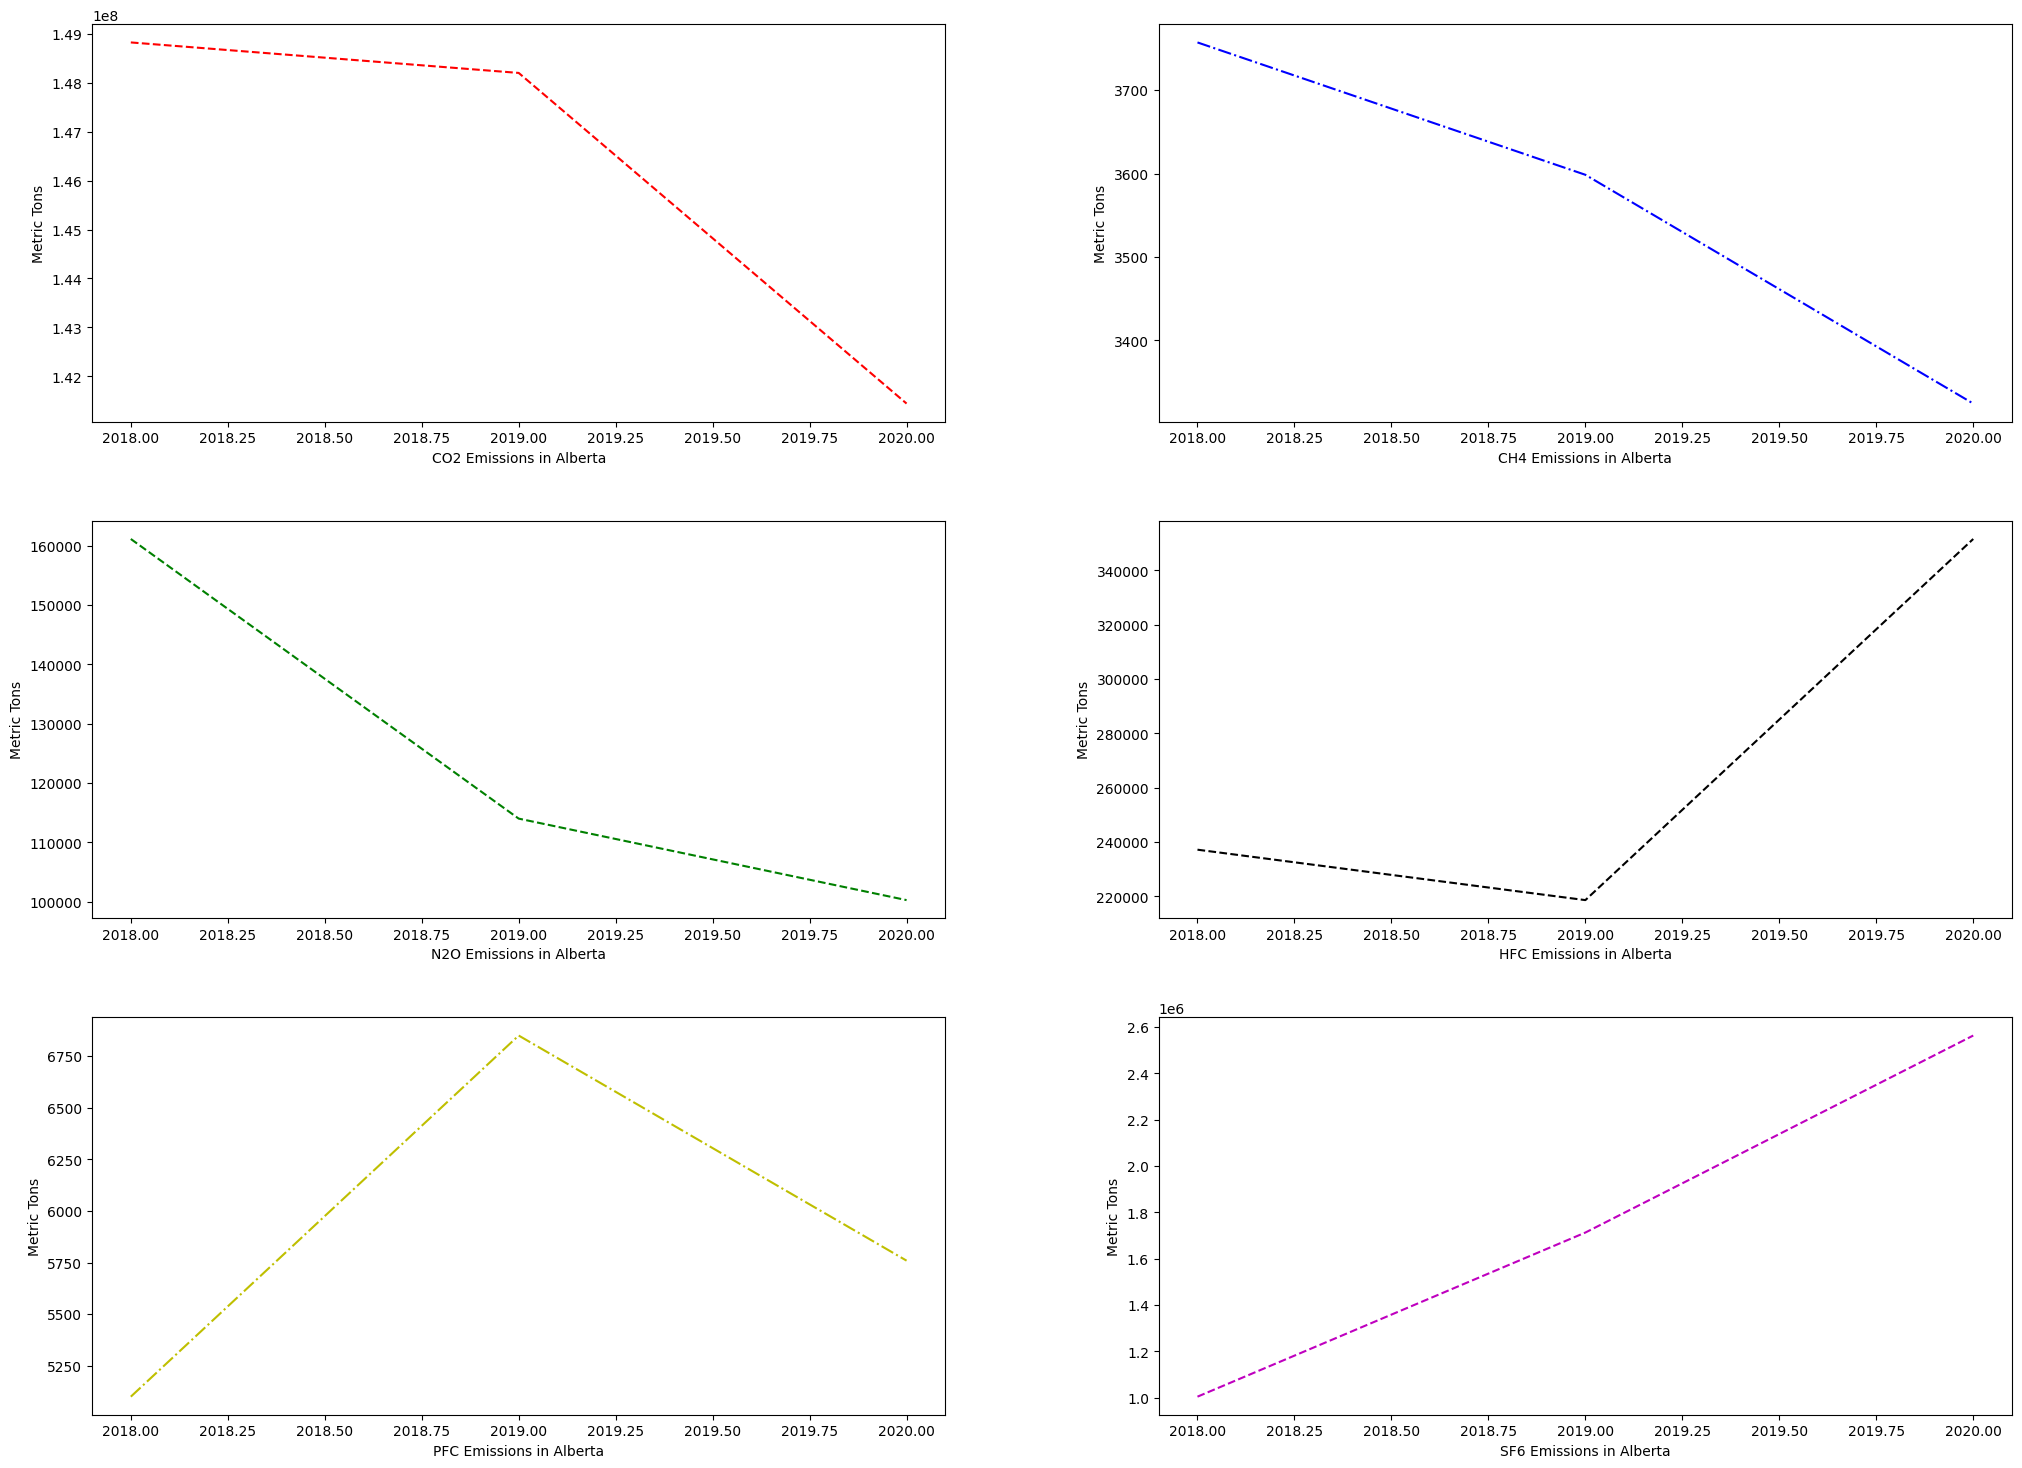

In [13]:
plt.subplot(6,2,1)
plt.plot(Years, Years_CO2, 'r--')
plt.xlabel("CO2 Emissions in Alberta")
plt.ylabel("Metric Tons")
plt.subplot(6,2,2)
plt.plot(Years, Years_CH4, 'b-.')
plt.xlabel("CH4 Emissions in Alberta")
plt.ylabel("Metric Tons")
plt.subplot(6,2,3)
plt.plot(Years, Years_N2O, 'g--')
plt.xlabel("N2O Emissions in Alberta")
plt.ylabel("Metric Tons")
plt.subplot(6,2,4)
plt.plot(Years, Years_HFC, 'k--')
plt.xlabel("HFC Emissions in Alberta")
plt.ylabel("Metric Tons")
plt.subplot(6,2,5)
plt.plot(Years, Years_PFC, 'y-.')
plt.xlabel("PFC Emissions in Alberta")
plt.ylabel("Metric Tons")
plt.subplot(6,2,6)
plt.plot(Years, Years_SF6, 'm--')
plt.xlabel("SF6 Emissions in Alberta")
plt.ylabel("Metric Tons")
plt.subplots_adjust(top=6, bottom=0, left=0, right=3, hspace=0.25,
                    wspace=0.25)
plt.show()

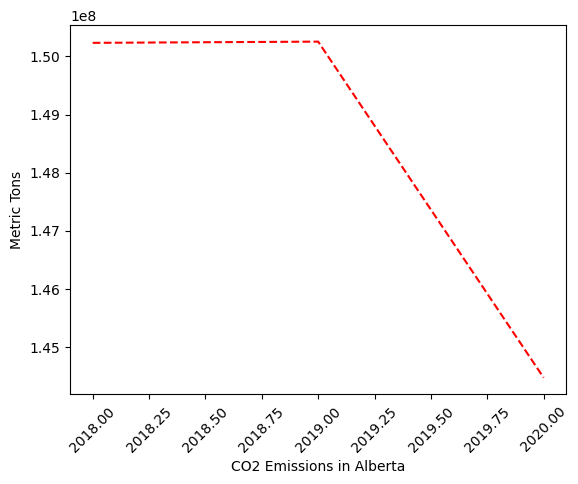

In [15]:
plt.plot(Years, np.array(Years_CO2) + np.array(Years_CH4) + np.array(Years_HFC) + np.array(Years_N2O) +np.array(Years_PFC) + np.array(Years_SF6), 'r--')
plt.xlabel("CO2 Emissions in Alberta")
plt.ylabel("Metric Tons")
plt.xticks(rotation=45)
plt.show()

In [16]:
finaldata

,Year,GHGRP ID,National Pollutant Release Inventory (NPRI) identifier,Company & facility name,NAICS,City,Province / territory,CO2,CH4,N20,HFC,PFC,SF6,Total,PDGES ID,NPRI,Company name and facility,Town,Province
0,2020,G10327,19289.0,Rio Tinto Alcan Inc - Strathcona Works,324190,Sherwood Park,Alberta,90263.674514,2.402175,7.195210,0.000,0.0,0.0,90273.271899,NaN,NaN,NaN,NaN,NaN
1,2020,G10152,6556.0,INEOS Canada Partnership - Joffre LAO Plant,325110,Joffre,Alberta,142087.672587,99.054200,639.238906,0.000,0.0,0.0,142825.965693,NaN,NaN,NaN,NaN,NaN
2,2020,G10097,126.0,Celanese Canada ULC. - Edmonton Site,325210,Edmonton,Alberta,24592.080000,154.750000,186.548000,764.200,0.0,0.0,25697.578000,NaN,NaN,NaN,NaN,NaN
3,2020,G11056,2630.0,Johns Manville Canada Inc. - Innisfail Plant,327214,Innisfail,Alberta,22162.550770,12.247425,104.772032,0.000,0.0,0.0,22279.570227,NaN,NaN,NaN,NaN,NaN
4,2020,G11174,4468.0,Bunge Canada - BUNGE CANADA - FORT SASKATCHEW...,311224,Sturgeon County,Alberta,15563.110000,7.322500,77.411460,0.000,0.0,0.0,15647.843960,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,2018,NaN,NaN,NaN,221112,NaN,NaN,192356.811700,372.825000,1316.474600,0.000,0.0,0.0,194046.111300,G10246,6701.0,TransCanada Energy Ltd. - Redwater Cogeneratio...,REDWATER,Alberta
2108,2018,NaN,NaN,NaN,331110,NaN,NaN,88592.196000,30.757250,324.930260,0.000,0.0,0.0,88947.883510,G10420,1106.0,Moly-Cop AltaSteel Ltd. - Moly-Cop AltaSteel Ltd.,EDMONTON,Alberta
2109,2018,NaN,NaN,NaN,211110,NaN,NaN,22193.408000,1587.075000,89.996000,0.000,0.0,0.0,23870.479000,G11647,NaN,Canadian Natural Resources Limited - Swan Hill...,NaN,Alberta
2110,2018,NaN,NaN,NaN,325190,NaN,NaN,16679.000000,7.015000,78.493200,1661.745,0.0,0.0,18426.253200,G11489,29415.0,Enerkem Alberta Biofuels - Enerkem Alberta Bio...,EDMONTON,Alberta


In [17]:
data2018[["CO2","CH4","N20","HFC","PFC","SF6","Total"]] = Data_2018[["CO2","CH4","N20","HFC","PFC","SF6","Total"]]
data2019[["CO2","CH4","N20","HFC","PFC","SF6","Total"]] = Data_2019[["CO2","CH4","N20","HFC","PFC","SF6","Total"]]
data2020[["CO2","CH4","N20","HFC","PFC","SF6","Total"]] = Data_2020[["CO2","CH4","N20","HFC","PFC","SF6","Total"]]
finaldata[["CO2","CH4","N20","HFC","PFC","SF6","Total"]] = Final_data[["CO2","CH4","N20","HFC","PFC","SF6","Total"]]

In [18]:
finaldata

,Year,GHGRP ID,National Pollutant Release Inventory (NPRI) identifier,Company & facility name,NAICS,City,Province / territory,CO2,CH4,N20,HFC,PFC,SF6,Total,PDGES ID,NPRI,Company name and facility,Town,Province
0,2020,G10327,19289.0,Rio Tinto Alcan Inc - Strathcona Works,324190,Sherwood Park,Alberta,90263.674514,0.060054,2.144173,0.0000,0.0,0.0,90265.878741,NaN,NaN,NaN,NaN,NaN
1,2020,G10152,6556.0,INEOS Canada Partnership - Joffre LAO Plant,325110,Joffre,Alberta,142087.672587,2.476355,190.493194,0.0000,0.0,0.0,142280.642136,NaN,NaN,NaN,NaN,NaN
2,2020,G10097,126.0,Celanese Canada ULC. - Edmonton Site,325210,Edmonton,Alberta,24592.080000,3.868750,55.591304,2674.7000,0.0,0.0,27326.240054,NaN,NaN,NaN,NaN,NaN
3,2020,G11056,2630.0,Johns Manville Canada Inc. - Innisfail Plant,327214,Innisfail,Alberta,22162.550770,0.306186,31.222066,0.0000,0.0,0.0,22194.079021,NaN,NaN,NaN,NaN,NaN
4,2020,G11174,4468.0,Bunge Canada - BUNGE CANADA - FORT SASKATCHEW...,311224,Sturgeon County,Alberta,15563.110000,0.183063,23.068615,0.0000,0.0,0.0,15586.361678,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,2018,NaN,NaN,NaN,221112,NaN,NaN,192356.811700,9.320625,392.309431,0.0000,0.0,0.0,192758.441756,G10246,6701.0,TransCanada Energy Ltd. - Redwater Cogeneratio...,REDWATER,Alberta
2108,2018,NaN,NaN,NaN,331110,NaN,NaN,88592.196000,0.768931,96.829217,0.0000,0.0,0.0,88689.794149,G10420,1106.0,Moly-Cop AltaSteel Ltd. - Moly-Cop AltaSteel Ltd.,EDMONTON,Alberta
2109,2018,NaN,NaN,NaN,211110,NaN,NaN,22193.408000,39.676875,26.818808,0.0000,0.0,0.0,22259.903683,G11647,NaN,Canadian Natural Resources Limited - Swan Hill...,NaN,Alberta
2110,2018,NaN,NaN,NaN,325190,NaN,NaN,16679.000000,0.175375,23.390974,5816.1075,0.0,0.0,22518.673849,G11489,29415.0,Enerkem Alberta Biofuels - Enerkem Alberta Bio...,EDMONTON,Alberta


In [19]:
Final_data.describe()

,CH4,CO2,HFC,N20,PFC,SF6
count,2112.000000,2.112000e+03,2112.000000,2112.000000,2112.000000,2112.000000
mean,202.271430,2.076073e+05,109.202844,596.514089,1.134649,104.625672
std,754.403633,8.816045e+05,1395.354815,2295.922889,26.537529,1552.259163
min,0.000034,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,21.223979,9.420313e+03,0.000000,22.378608,0.000000,0.000000
50%,70.311312,1.647046e+04,0.000000,82.174781,0.000000,0.000000
75%,154.257094,4.772739e+04,0.000000,332.826292,0.000000,0.000000
max,19802.314125,1.195989e+07,48531.721000,47694.328376,771.614361,42564.791040


In [20]:
finaldata[["PDGES ID","NPRI","NAICS","Province"]]

,PDGES ID,NPRI,NAICS,Province
0,NaN,NaN,324190,NaN
1,NaN,NaN,325110,NaN
2,NaN,NaN,325210,NaN
3,NaN,NaN,327214,NaN
4,NaN,NaN,311224,NaN
...,...,...,...,...
2107,G10246,6701.0,221112,Alberta
2108,G10420,1106.0,331110,Alberta
2109,G11647,NaN,211110,Alberta
2110,G11489,29415.0,325190,Alberta


Drop the 'PDGES ID','NPRI','NAICS','Province'data




In [21]:
finaldata = finaldata.drop(['PDGES ID','NPRI','NAICS','Province','National Pollutant Release Inventory (NPRI) identifier'], axis = 1)

In [22]:
finaldata.head()

,Year,GHGRP ID,Company & facility name,City,Province / territory,CO2,CH4,N20,HFC,PFC,SF6,Total,Company name and facility,Town
0,2020,G10327,Rio Tinto Alcan Inc - Strathcona Works,Sherwood Park,Alberta,90263.674514,0.060054,2.144173,0.0,0.0,0.0,90265.878741,NaN,NaN
1,2020,G10152,INEOS Canada Partnership - Joffre LAO Plant,Joffre,Alberta,142087.672587,2.476355,190.493194,0.0,0.0,0.0,142280.642136,NaN,NaN
2,2020,G10097,Celanese Canada ULC. - Edmonton Site,Edmonton,Alberta,24592.080000,3.868750,55.591304,2674.7,0.0,0.0,27326.240054,NaN,NaN
3,2020,G11056,Johns Manville Canada Inc. - Innisfail Plant,Innisfail,Alberta,22162.550770,0.306186,31.222066,0.0,0.0,0.0,22194.079021,NaN,NaN
4,2020,G11174,Bunge Canada - BUNGE CANADA - FORT SASKATCHEW...,Sturgeon County,Alberta,15563.110000,0.183063,23.068615,0.0,0.0,0.0,15586.361678,NaN,NaN


create train group and test group from final data

In [23]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(finaldata, test_size=0.2, random_state=42)

In [24]:
train_set

,Year,GHGRP ID,Company & facility name,City,Province / territory,CO2,CH4,N20,HFC,PFC,SF6,Total,Company name and facility,Town
162,2020,G12179,ARC RESOURCES LTD. - Kakwa 16-16-064-04W6,Grande Prairie,Alberta,27108.90000,60.062500,62.162800,0.0,0.0,0.0,27231.1253,NaN,NaN
1764,2018,NaN,NaN,NaN,NaN,930786.92090,301.043163,406.098028,0.0,0.0,0.0,931494.06209,MEG Energy Corp. - MEG Christina Lake Regional...,Regional Municipality of Wood Buffalo
1514,2018,NaN,NaN,NaN,NaN,120020.67410,45.809625,267.424366,0.0,0.0,0.0,120333.908091,ATCO Power Canada Ltd. - Valleyview Generating...,Valleyview
649,2020,G11121,Spray Lake Sawmills (1980) Ltd. - Spray Lake S...,Cochrane,Alberta,8799.72181,0.138618,33.789656,0.0,0.0,0.0,8833.650083,NaN,NaN
1281,2019,NaN,NaN,NaN,NaN,31469.23570,0.966669,15.593982,0.0,0.0,0.0,31485.796351,Razor Energy Corp. - Swan Hills OB 03-19-65-10W5,HIGH PRAIRIE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,2018,NaN,NaN,NaN,NaN,13982.91000,53.567500,17.849604,0.0,0.0,0.0,14054.327104,Canadian Natural Resources Limited - Chinchaga...,NaN
1095,2019,NaN,NaN,NaN,NaN,15003.63613,187.530113,55.842619,0.0,0.0,0.0,15247.008862,Husky Oil Operations Limited - Ansell Gas Plan...,EDSON
1130,2019,NaN,NaN,NaN,NaN,9417.11600,66.230000,23.266648,0.0,0.0,0.0,9506.612648,IPC Canada Ltd. - Suffield CD Comp Stn 01-04,NaN
1294,2019,NaN,NaN,NaN,NaN,18948.45000,8.668125,818.986010,0.0,0.0,0.0,19776.104135,Weyerhaeuser Company Limited - Edson O.S.B.,EDSON


In [25]:
test_set

,Year,GHGRP ID,Company & facility name,City,Province / territory,CO2,CH4,N20,HFC,PFC,SF6,Total,Company name and facility,Town
544,2020,G12171,Canlin Energy Corporation - BLACKSTONE 9-23-44...,NORDEGG,Alberta,1.908238e+04,91.126000,303.514311,0.0,0.0,0.0,19477.025311,NaN,NaN
1989,2018,NaN,NaN,NaN,NaN,3.376697e+06,93.120579,5693.846068,0.0,0.0,0.0,3382484.003647,TransAlta Generation Partnership - Sundance Th...,Duffield
420,2020,G12357,Hammerhead Resources Inc - HHR Gold Creek 03-1...,GRANDE PRAIRIE,Alberta,1.808934e+04,38.920813,40.583428,0.0,0.0,0.0,18168.843241,NaN,NaN
527,2020,G10475,Husky Oil Operations Limited - Lloydminster Re...,Lloydminster,Alberta,9.504872e+04,8.944463,94.474135,0.0,0.0,0.0,95152.139978,NaN,NaN
196,2020,G10789,Pembina Pipeline Corporation - Saturn Deepcut ...,GREENVIEW NO. 16,Alberta,1.213817e+05,60.344875,268.676502,0.0,0.0,0.0,121710.724577,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,2020,G11850,Petrus Resources Ltd. - Arriva 02-25 Gas Plant,ROCKY MOUNTAIN HOUSE,Alberta,2.230822e+04,71.223938,51.009018,0.0,0.0,0.0,22430.451655,NaN,NaN
1447,2018,NaN,NaN,NaN,NaN,8.126969e+03,46.759062,82.632122,0.0,0.0,0.0,8256.360585,Bonavista Energy Corporation - South Rosevear ...,Edson
73,2020,G12199,Murphy Oil Company Ltd - TWO CREEKS 16-29 OIL BT,GREENVIEW,Alberta,1.586638e+04,27.683500,23.657386,0.0,0.0,0.0,15917.720886,NaN,NaN
1886,2018,NaN,NaN,NaN,NaN,8.743704e+03,118.391250,160.548752,0.0,0.0,0.0,9022.644002,Canlin Energy Corporation - PETRO-CAN MED HAT #1,Medicine Hat


In [26]:
GHGs = train_set.drop("Total", axis=1) # drop labels for training set
GHGs_labels = train_set["Total"].copy()

In [27]:
'''
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(finaldata):
    strat_train_set = finaldata.loc[train_index]
    strat_test_set = finaldata.loc[test_index]
'''

'\nfrom sklearn.model_selection import StratifiedShuffleSplit\n\nsplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)\nfor train_index, test_index in split.split(finaldata):\n    strat_train_set = finaldata.loc[train_index]\n    strat_test_set = finaldata.loc[test_index]\n'

In [28]:
GHGs_labels.head()

162        27231.1253
1764     931494.06209
1514    120333.908091
649       8833.650083
1281     31485.796351
Name: Total, dtype: object

#but need to take out the string keys does not work

In [29]:
GHGs_prepared = GHGs.drop(["Company name and facility","Town", "Year","GHGRP ID", "Company & facility name", "Province / territory", "City"], axis=1)
GHGs.head()

,Year,GHGRP ID,Company & facility name,City,Province / territory,CO2,CH4,N20,HFC,PFC,SF6,Company name and facility,Town
162,2020,G12179,ARC RESOURCES LTD. - Kakwa 16-16-064-04W6,Grande Prairie,Alberta,27108.90000,60.062500,62.162800,0.0,0.0,0.0,NaN,NaN
1764,2018,NaN,NaN,NaN,NaN,930786.92090,301.043163,406.098028,0.0,0.0,0.0,MEG Energy Corp. - MEG Christina Lake Regional...,Regional Municipality of Wood Buffalo
1514,2018,NaN,NaN,NaN,NaN,120020.67410,45.809625,267.424366,0.0,0.0,0.0,ATCO Power Canada Ltd. - Valleyview Generating...,Valleyview
649,2020,G11121,Spray Lake Sawmills (1980) Ltd. - Spray Lake S...,Cochrane,Alberta,8799.72181,0.138618,33.789656,0.0,0.0,0.0,NaN,NaN
1281,2019,NaN,NaN,NaN,NaN,31469.23570,0.966669,15.593982,0.0,0.0,0.0,Razor Energy Corp. - Swan Hills OB 03-19-65-10W5,HIGH PRAIRIE


In [30]:
from sklearn.linear_model import LinearRegression
print("GHGs",GHGs.shape,type(GHGs))
print("GHGs_prepared",GHGs_prepared.shape)
print("GHGs_labels",GHGs_labels.shape)
lin_reg = LinearRegression()
lin_reg.fit(GHGs_prepared, GHGs_labels)

GHGs (1689, 13) <class 'pandas.core.frame.DataFrame'>
GHGs_prepared (1689, 6)
GHGs_labels (1689,)


LinearRegression()

<Axes: >

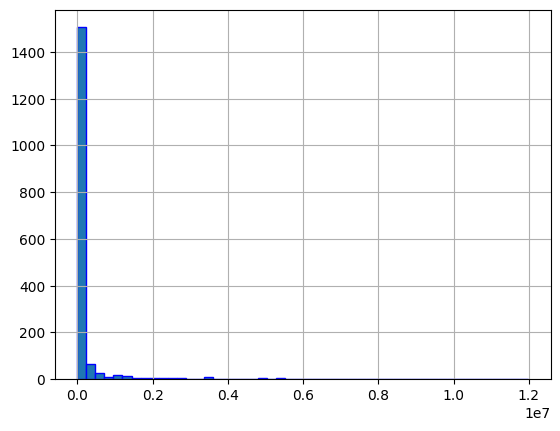

In [31]:
GHGs_labels.hist(bins=50,edgecolor='b')

In [32]:
some_data = GHGs_prepared[:5]
GHGs_prepared[:5]

,CO2,CH4,N20,HFC,PFC,SF6
162,27108.90000,60.062500,62.162800,0.0,0.0,0.0
1764,930786.92090,301.043163,406.098028,0.0,0.0,0.0
1514,120020.67410,45.809625,267.424366,0.0,0.0,0.0
649,8799.72181,0.138618,33.789656,0.0,0.0,0.0
1281,31469.23570,0.966669,15.593982,0.0,0.0,0.0


In [33]:
some_labels = GHGs_labels.iloc[:5]
predictions=lin_reg.predict(some_data)
print("labels - predictions\n"),[print('{:.0f}'.format(GHGs_labels[i]),'{:.0f}'.format(predictions[i])) for i in range(5)]
print()

labels - predictions

90266 27231
142281 931494
27326 120334
22194 8834
15586 31486



In [34]:
print(type(some_data),type(some_labels),type(some_data),type(predictions))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


Let us evaluate how good the Mean Squared Error (MSE) is when all data are considered

In [35]:
from sklearn.metrics import mean_squared_error
GHGs_predictions = lin_reg.predict(GHGs_prepared)
lin_mse = mean_squared_error(GHGs_labels, GHGs_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.1549820614079913e-10

In [36]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(GHGs_prepared, GHGs_labels)

DecisionTreeRegressor(random_state=42)

In [37]:
GHGs_predictions = tree_reg.predict(GHGs_prepared)
tree_mse = mean_squared_error(GHGs_labels, GHGs_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0